Baseline text classification

As a first step, we evaluate how well review sentiment can be predicted from text alone.
We use a simple TF-IDF representation combined with a logistic regression classifier.
This baseline serves as a reference before focusing on conditional text generation.

In [1]:
with open("../reports/baseline_metrics.txt", "r", encoding="utf-8") as f:
    print(f.read())


ROC-AUC: 0.8703

              precision    recall  f1-score   support

           0     0.9000    0.0667    0.1241       135
           1     0.8570    0.9987    0.9224       756

    accuracy                         0.8575       891
   macro avg     0.8785    0.5327    0.5233       891
weighted avg     0.8635    0.8575    0.8015       891


Confusion matrix:
[[  9 126]
 [  1 755]]



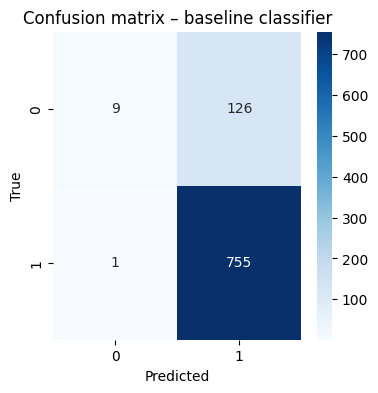

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

df = pd.read_csv("../data/processed/reviews.csv")
df["review_text"] = df["review_text"].fillna("").astype(str)

X = df["review_text"]
y = df["recommended"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=50000, ngram_range=(1, 2), min_df=2)),
    ("clf", LogisticRegression(max_iter=2000))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix – baseline classifier")
plt.show()


The baseline achieves a strong ROC-AUC despite its simplicity, confirming that sentiment information is largely explicit in the review text.
Given this strong performance, further gains from more complex classifiers are likely marginal.
We therefore shift our focus to a more original task: conditional generation of reviews given a target sentiment.